# Introduction

A classical logistic regression model.

# Setup

In [748]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [749]:
# Load data

df = pd.read_csv("../../data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [750]:
# Drop Id

df = df.drop(columns=["Id"])

In [751]:
# Seperate features and labels

features = df.drop(columns=["Species"]).values
labels = df["Species"].unique()
labels_onehot = pd.get_dummies(df["Species"]).astype(int).values

features[:5], labels_onehot[:5], labels

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]]),
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))

In [752]:
# Train and test splits

X_train, X_val, y_train, y_val = train_test_split(features, labels_onehot, test_size=0.2)

In [753]:
print(f'Training dataset size: {len(X_train)}')
print(f'Validation dataset size: {len(X_val)}')

Training dataset size: 120
Validation dataset size: 30


# Model

In [754]:
# Model

def model(X, weights, bias):
    return np.dot(X, weights) + bias

In [755]:
# Softmax function

def softmax(z):
    exps = np.exp(z - np.max(z, axis=1, keepdims=True)) # subtract max element for numerical stability
    return exps / np.sum(exps, axis=1, keepdims=True)

In [756]:
# Accuracy function

def accuracy_fn(y, y_pred):
    return np.sum(np.argmax(y, axis=1) == np.argmax(y_pred, axis=1)) / len(y)

In [757]:
# Loss function (Categorical Cross-Entropy)

def cce(y, y_pred_probs):
    m = y.shape[0] # batch size
    return -np.sum(y * np.log(y_pred_probs)) / m

In [758]:
def compute_gradients(X, y, y_pred_probs):
    m = len(y)
    error = y_pred_probs - y 
    w_grad = np.dot(X.T, error) / m
    b_grad = np.sum(error, axis=0) / m
    return w_grad, b_grad

In [759]:
def gradient_descent(X, y, y_pred_probs, w_init, b_init, learning_rate):
    w = w_init
    b = b_init

    w_grad, b_grad = compute_gradients(X, y, y_pred_probs)

    w -= learning_rate * w_grad
    b -= learning_rate * b_grad

    return w, b

In [760]:
def train_step(X, y, w, b, learning_rate):
    y_logits = model(X, w, b)
    y_pred_probs = softmax(y_logits)

    w, b, = gradient_descent(X, y, y_pred_probs, w, b, learning_rate)
    loss = cce(y, y_pred_probs)
    acc = accuracy_fn(y, y_pred_probs)

    return w, b, loss, acc

In [761]:
def test_step(X, y, w, b):
    y_logits = model(X, w, b)
    y_pred_probs = softmax(y_logits)
    loss = cce(y, y_pred_probs)
    acc = accuracy_fn(y, y_pred_probs)
    return loss, acc

In [762]:
def train_model(X_train, y_train, X_test, y_test, w, b, learning_rate, epochs, metrics):
    for epoch in range(epochs):
        w, b, train_loss, train_acc = train_step(X_train, y_train, w, b, learning_rate)
        test_loss, test_acc = test_step(X_test, y_test, w, b)

        metrics["train_losses"].append(train_loss)
        metrics["train_accuracies"].append(train_acc)
        metrics["test_losses"].append(test_loss)
        metrics["test_accuracies"].append(test_acc)

        if epoch % (epochs/10) == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%")

In [763]:
# Initialize metrics

metrics = {}
metrics["model"] = "Logistic Regression"
metrics["train_losses"] = []
metrics["train_accuracies"] = []
metrics["test_losses"] = []
metrics["test_accuracies"] = []

metrics

{'model': 'Logistic Regression',
 'train_losses': [],
 'train_accuracies': [],
 'test_losses': [],
 'test_accuracies': []}

In [764]:
# Initialize parameters 

n_features = features.shape[1]
n_classes = labels_onehot.shape[1]
w = np.zeros((n_features, n_classes))
b = np.zeros(n_classes)

In [765]:
# Initialize hyperparameters

learning_rate = 0.01
epochs = 10000

In [766]:
train_model(X_train, y_train,
            X_val, y_val,
            w, b,
            learning_rate,
            epochs,
            metrics)

Epoch: 0 | Train Loss: 1.0986 | Train Acc: 31.67% | Test Loss: 1.0919 | Test Acc: 26.67%
Epoch: 1000 | Train Loss: 0.3611 | Train Acc: 96.67% | Test Loss: 0.3398 | Test Acc: 96.67%
Epoch: 2000 | Train Loss: 0.2730 | Train Acc: 97.50% | Test Loss: 0.2578 | Test Acc: 96.67%
Epoch: 3000 | Train Loss: 0.2266 | Train Acc: 98.33% | Test Loss: 0.2144 | Test Acc: 96.67%
Epoch: 4000 | Train Loss: 0.1976 | Train Acc: 98.33% | Test Loss: 0.1869 | Test Acc: 93.33%
Epoch: 5000 | Train Loss: 0.1778 | Train Acc: 98.33% | Test Loss: 0.1677 | Test Acc: 93.33%
Epoch: 6000 | Train Loss: 0.1633 | Train Acc: 97.50% | Test Loss: 0.1536 | Test Acc: 93.33%
Epoch: 7000 | Train Loss: 0.1522 | Train Acc: 97.50% | Test Loss: 0.1426 | Test Acc: 93.33%
Epoch: 8000 | Train Loss: 0.1435 | Train Acc: 97.50% | Test Loss: 0.1338 | Test Acc: 93.33%
Epoch: 9000 | Train Loss: 0.1363 | Train Acc: 97.50% | Test Loss: 0.1266 | Test Acc: 93.33%


## Visualizing Metrics

In [767]:
def plot_metrics(metrics: dict):
    x = range(0, len(metrics["train_losses"]))

    plt.figure(figsize=(15, 6))

    plt.subplot(2, 1, 1)
    plt.title("Loss")
    plt.plot(x, metrics["train_losses"], label="Train Losses")
    plt.plot(x, metrics["test_losses"], label="Test Losses")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title("Accuracy")
    plt.plot(x, metrics["train_accuracies"], label="Train Accuracies")
    plt.plot(x, metrics["test_accuracies"], label="Test Accuracies")
    plt.legend()

    plt.show()

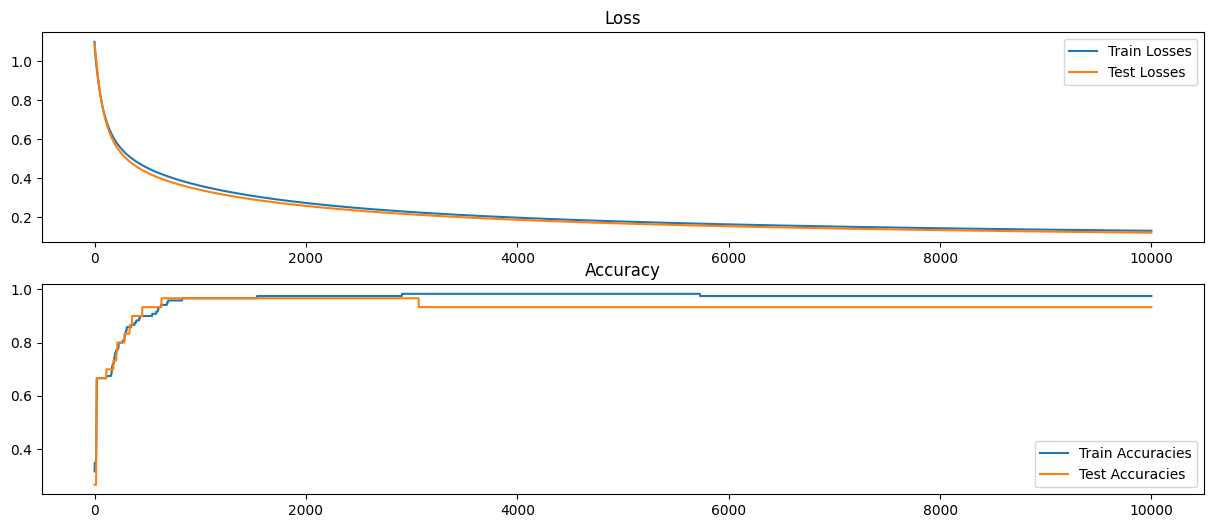

In [768]:
plot_metrics(metrics)

In [769]:
print(f"Lowest loss on test dataset: {min(metrics['test_losses']):.6f}")
print(f"Highest accuracy on test dataset: {max(metrics['test_accuracies'])*100:.4f}%")

Lowest loss on test dataset: 0.120520
Highest accuracy on test dataset: 96.6667%


# Conclusion

The logistic regression model performs great on Iris classification, achieving up to 96.6% accuracy on the validation dataset.

Metrics:
- Lowest loss on test dataset: 0.120520
- Highest accuracy on test dataset: 96.6667%